## **Zillow Housing Dataset EDA**

🧭 EDA Phase: Problem Framing, and Initial Data Exploration

🔍 Objective
In this milestone, your team will kick off your end-to-end machine learning project by:
Establishing team roles and communication norms
Framing the business problem
Conducting initial exploration and cleaning of the data
Identifying early feature relationships and opportunities for feature engineering


✅ Responsibilities


Frame the Problem
Define the prediction goal, evaluate business value, and identify success metrics.
Initial Data Exploration
Perform basic exploration: look for patterns, anomalies, and gain domain familiarity.
Basic Data Cleaning
Handle missing values (drop or impute), encode categorical variables, and flag outliers.
Explore Feature Relationships
Use visualization and correlation techniques to investigate feature relevance.
Feature Engineering (Initial Ideas)
Propose potential transformations to better expose patterns in the data.




In [ ]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# =============================
# Useful Imports
# =============================

# Standard Libraries
import os
import time
import math
import io
import zipfile
import requests
from urllib.parse import urlparse
from itertools import chain, combinations

# Data Science Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as mticker  # Optional: Format y-axis labels as dollars

# Scikit-learn (Machine Learning)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedKFold
)
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, f_regression, SelectKBest, RFE
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore

# Kaggle and Progress Tracking
import kagglehub
from tqdm import tqdm

# =============================
# Global Variables
# =============================
random_state = 42

# =============================
# Utility Functions
# =============================

# Format y-axis labels as dollars with commas (optional)
def dollar_format(x, pos):
    return f'${x:,.0f}'

# Convert seconds to HH:MM:SS format
def format_hms(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))

## Prelude: Download the Zillow Housing Dataset

The code cell below will load the dataset for you.    

> **Notice that before downloading, this cell first checks whether the files already exist.**

For a detailed description of the dataset features, please refer to  **Appendix 1** below.

**Note:** Do **not** perform a train/test split for this milestone (unlike HOML suggests), since you need to do the split **after** any data preparation and feature engineering. You can wait until Milestone 2 to do the split.

In [ ]:
url = "https://www.cs.bu.edu/fac/snyder/cs505/Data/zillow_dataset.csv"

filename = os.path.basename(urlparse(url).path)

if not os.path.exists(filename):
    try:
        print("Downloading the file...")
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        with open(filename, "wb") as f:
            f.write(response.content)
        print("File downloaded successfully.")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
else:
    print("File already exists. Skipping download.")

df = pd.read_csv(filename)

File already exists. Skipping download.


## Part 1: Frame the problem and look at the big picture [3 pts]

This part is a bit vague, since this project is not taking place in an actual business, but for the sake of exercizing all the steps, **pretend** that you are working at Zillow as a data analyst and are given this dataset and asked to
- Analyze and understand the data;
- Create a regression model;
- Give a presentation to the marketing team about your results.  

#### **1 Discussion:**

AFTER doing your EDA, come back and answer each of the following 3 questions in a *concise and informative paragraph between the lines;* you may wish to use your own business or home-buying experience, or to do some online research about the issues before you propose your ideas. (Don't stress about this, but *humor your professor and give it your best shot!*)


**1.1:**  What is the objective of this project in business terms?


**1.2:**  How will your solution be used?


**1.3:**  How should success (or failure) be measured?


The objective of this project is to predict property values accurately based on key property attributes and location factors using Zillow data.

This can help real estate investors, homebuyers, and property managers make data-driven decisions on pricing, investment opportunities, and market trends. Additionally, it can assist tax assessors and policymakers in understanding regional housing price distributions.

Our predictions may be measured by the model performance using the MSE/RMSE. However, in our case we only considered Linear Regression, for future studies we may consider more complex models like Random Forest, Support Vector Machines, KNN, or Gradient Boosting.

## Part 2: Download and perform preliminary exploration of the data [4 pts]

### Part 2.A: Load the data into a dataframe and study each feature/column and its characteristics:
- Name
- Type (categorical, int/float, text, etc.)
- Apparent usefulness for the task
- Approximate % of missing values
- How many unique values

**Note:** The **target** is the last column `'taxvaluedollarcnt'` -- pay particular attention to this during the EDA process.
  
Hint: Just use `.head()`, `.info()`, and `.nunique()`.

In [ ]:
# Head

df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,assessmentyear,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,taxvaluedollarcnt
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,1998.0,NaN,NaN,2016.0,NaN,NaN,6.059063e+13,1023282.0
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,1967.0,1.0,NaN,2016.0,NaN,NaN,6.111001e+13,464000.0
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,NaN,1962.0,1.0,NaN,2016.0,NaN,NaN,6.059022e+13,564778.0
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,NaN,1970.0,NaN,NaN,2016.0,NaN,NaN,6.037300e+13,145143.0
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,NaN,1964.0,NaN,NaN,2016.0,NaN,NaN,6.037124e+13,119407.0


In [ ]:
# Info

df.info()

# Dtypes (float64, int64, object)

df.select_dtypes(include = ["float64"]).columns, df.select_dtypes(include = ["int64"]).columns, df.select_dtypes(include = ["object"]).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   airconditioningtypeid         25007 non-null  float64
 2   architecturalstyletypeid      207 non-null    float64
 3   basementsqft                  50 non-null     float64
 4   bathroomcnt                   77579 non-null  float64
 5   bedroomcnt                    77579 non-null  float64
 6   buildingclasstypeid           15 non-null     float64
 7   buildingqualitytypeid         49809 non-null  float64
 8   calculatedbathnbr             76963 non-null  float64
 9   decktypeid                    614 non-null    float64
 10  finishedfloor1squarefeet      6037 non-null   float64
 11  calculatedfinishedsquarefeet  77378 non-null  float64
 12  finishedsquarefeet12          73923 non-null  float64
 13  f

(Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
        'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
        'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
        'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
        'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
        'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
        'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
        'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
        'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
        'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
        'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
        'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
        'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
        'numberofstories', 'assessmentyear', 'taxdel

In [ ]:
# Missing Values in Percentages

missing_perc = df.isna().mean() * 100
missing_perc.sort_values(ascending=False)
print(missing_perc)

parcelid                         0.000000
airconditioningtypeid           67.779882
architecturalstyletypeid        99.733292
basementsqft                    99.935578
bathroomcnt                      0.043807
bedroomcnt                       0.043807
buildingclasstypeid             99.980673
buildingqualitytypeid           35.823895
calculatedbathnbr                0.837489
decktypeid                      99.208895
finishedfloor1squarefeet        92.221664
calculatedfinishedsquarefeet     0.302784
finishedsquarefeet12             4.754358
finishedsquarefeet13            99.945885
finishedsquarefeet15            96.099880
finishedsquarefeet50            92.221664
finishedsquarefeet6             99.502661
fips                             0.043807
fireplacecnt                    89.320088
fullbathcnt                      0.837489
garagecarcnt                    67.118910
garagetotalsqft                 67.118910
hashottuborspa                  98.017085
heatingorsystemtypeid           36

In [ ]:
# Check How Many Missing Values

df.isna().sum()

parcelid                            0
airconditioningtypeid           52606
architecturalstyletypeid        77406
basementsqft                    77563
bathroomcnt                        34
bedroomcnt                         34
buildingclasstypeid             77598
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      76999
finishedfloor1squarefeet        71576
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77571
finishedsquarefeet15            74586
finishedsquarefeet50            71576
finishedsquarefeet6             77227
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
hashottuborspa                  76074
heatingorsystemtypeid           28042
latitude                           34
longitude                          34
lotsizesquar

In [ ]:
# Percentage of Missing Values (then index)

missing_df = (1 - df.count() / len(df)) * 100
missing_df[missing_df >= 95].index

# len(missing_df[missing_df >= 95].index) # 18

Index(['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid',
       'decktypeid', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet6', 'hashottuborspa', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'storytypeid', 'typeconstructiontypeid',
       'yardbuildingsqft17', 'yardbuildingsqft26', 'fireplaceflag',
       'taxdelinquencyflag', 'taxdelinquencyyear'],
      dtype='object')

In [ ]:
# NUnique

nunique = df.nunique()

# Unique DataFrame

df_unique = nunique[(nunique >= 0.6 * len(df)) | (nunique < 3)]
df_unique.index # 15

Index(['parcelid', 'buildingclasstypeid', 'decktypeid', 'hashottuborspa',
       'latitude', 'longitude', 'poolcnt', 'pooltypeid10', 'pooltypeid2',
       'pooltypeid7', 'storytypeid', 'fireplaceflag', 'assessmentyear',
       'taxdelinquencyflag', 'taxvaluedollarcnt'],
      dtype='object')

In [ ]:
# DataFrame of "id" columns

df_id = df.filter(regex = "id")
df_id.columns, df_id.shape # 17 variables

(Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
        'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid',
        'heatingorsystemtypeid', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
        'propertylandusetypeid', 'regionidcity', 'regionidcounty',
        'regionidneighborhood', 'regionidzip', 'storytypeid',
        'typeconstructiontypeid'],
       dtype='object'),
 (77613, 17))

#### **2.A Discussion:** Answer the following questions.

**2.A.1:**  Which features are categorical?

These variables, according to "object" are categorical:
- hashottuborspa
- propertycountylandusecode
- propertyzoningdesc
- fireplaceflag
- taxdelinquencyflag

Additionally, the variables which contain "id" may also be considered as categorical variables.

**2.A.2:**  Are there any features which appear at first glance to be **useless** for the business purpose of this project and should be deleted?  Give examples and describe your reasoning briefly.

We believe the "id" variables are useless and will likely not provide as much insight as others. These variables are:
- parcelid
- airconditioningtypeid
- architecturalstyletypeid
- buildingclasstypeid
- buildingqualitytypeid
- decktypeid
- heatingorsystemtypeid
- pooltypeid10
- pooltypeid2
- pooltypeid7
- propertylandusetypeid
- regionidcity
- regionidcounty
- regionidneighborhood
- regionidzip (we are keeping this id variable)
- storytypeid
- typeconstructiontypeid

Two categorical variables are not helpful:
- propertycountylandusecode
- propertyzoningdesc

We will also say these two are useless:
- latitude
- longitude

After removing values by the zscores, we found the following give us NULL columns:
- finishedfloor1squarefeet
- finishedsquarefeet50

There are 17 variables which contain "id" in its name, however we are only keeping regionidzip, plus the two categorical variables, latitude and longitude, and finishedfloor1squarefeet and finishedsquarefeet50. (22)

**2.A.3:**  Are there any features which appear to be **useless** because of the percentage of missing values?  If so, give an example.

There are 77613 total rows and many variables contain very little non-null values. We created a missing values dataframe, which shows the percentage of missing values for each column. We will consider too many missing values above 95% as useless. These variables include:
- basementsqft
- finishedsquarefeet13
- finishedsquarefeet15
- finishedsquarefeet6
- poolsizesum
- yardbuildingsqft17
- yardbuildingsqft26
- taxdelinquencyyear
- taxdelinquencyflag
- hashottuborspa
- fireplaceflag

The following has already been deemed as useless in the previous question:
- architecturalstyletypeid
- buildingclasstypeid
- decktypeid
- pooltypeid10
- pooltypeid2
- storytypeid
- typeconstructiontypeid

There are 11 new variables we may deem as useless according to the percentage of missing values, with 7 repeating from the previous question. (11)

**2.A.4:**  Are there any features which appear to be **useless** because of the number of unique values?  If so, give an example.

If a variables contains less than or equal to 3 unique values, it may be considered useless (unless it's a useful categorical variable). The values that contain way too many unique values (or greater than or equal to 60% of unique values according to the total rows), usually are the "id" variables.

The following variables contain less than or equal to 3 unique values, or greater than equal to 60% of unique values according to the total rows:
- poolcnt
- assessmentyear
- taxvaluedollarcnt (this is our TARGET variable, so we need to keep it)

With the following having already been deemed as useless:
- hashottuborspa
- latitude
- longitude
- parcelid
- buildingclasstypeid
- decktypeid
- pooltypeid10
- pooltypeid2
- pooltypeid7
- storytypeid
- fireplaceflag
- taxdelinquencyflag

There are 3 new variables we may say are useless according to the number of unique values, with 12 repeating from previous questions. (2)

According to what we may consider as "useless", there are 33 total variables that may be removed. This will leave us with 22 variables to study.

### Part 2.B: Exploratory Data Analysis (EDA) -- Feature-Level Visualization  

- To get an overview, generate histograms for all features using `df.hist()`  (Hint: increase the figsize and set the layout to `(-1,m)` to get  `m` columns and as many rows as necessary.)
- Generate individual visualizations for the **target and three (3)** other interesting-looking features in the dataset (i.e., a total of 4):  
    - Use appropriate plot types (e.g., histograms and boxplots for numerical features, bar plots for categorical features) to understand distributions and identify potential outliers for these three.
    - Use as many code cells as you need, and give comments describing what each cell does.
    - Answer the discussion question posed (you should choose 3 features for which you can say something interesting in the discussion).  

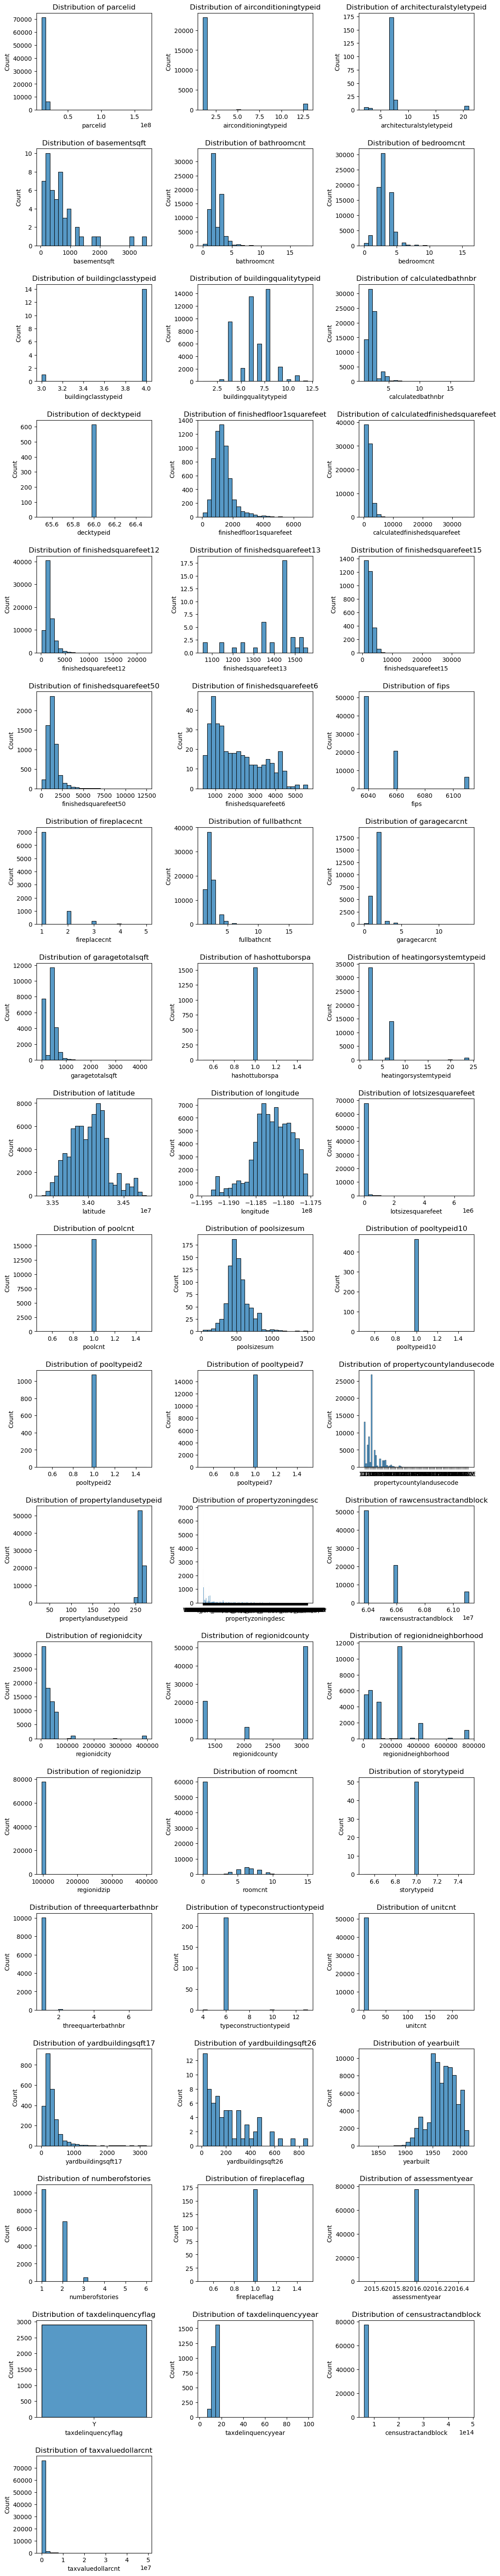

In [ ]:
#Histograms

#Determining figure layout
n_columns = len(df.columns)
n_rows = (n_columns // 3) + (n_columns % 3 > 0)

fig, axes = plt.subplots(n_rows, 3, figsize=(13, 4 * n_rows)) # changed from (15, 5 * n_rows)
axes = axes.flatten()

#Going through the features to create individual histograms
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=False, bins=25, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

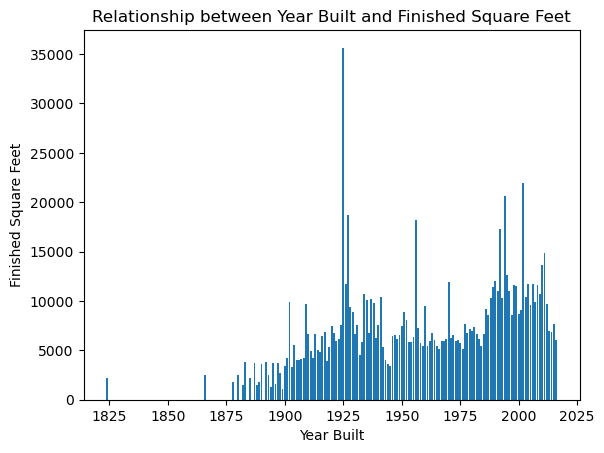

In [ ]:
# Histogram of Year Built vs. Calculated Finished Square Feet

plt.bar(df['yearbuilt'], df['calculatedfinishedsquarefeet'])
plt.xlabel('Year Built')
plt.ylabel('Finished Square Feet')
plt.title('Relationship between Year Built and Finished Square Feet')

plt.show()

The bar graph shows a strong positive correlation between 'yearbuilt' and 'calculatedfinishedsquarefeet'. As time goes on, the houses built are generally increasing in size. There are some outliers and noticable dips in the pattern, but these dips could be explained given historical context.

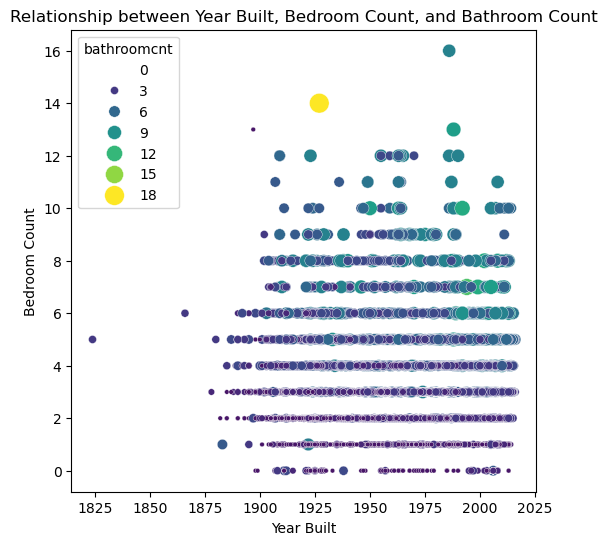

In [ ]:
#Plot of Year Built vs. Bedroom and Bathroom Count
plt.figure(figsize = (6,6))

min_bath = df['bathroomcnt'].min()
max_bath = df['bathroomcnt'].max()
min_bed = df['bedroomcnt'].min()
max_bed = df['bedroomcnt'].max()
maxbubble = 200

ax = sns.scatterplot(data = df, x = "yearbuilt", y = "bedroomcnt", size = "bathroomcnt", sizes = (min_bath / max_bath * maxbubble, maxbubble), hue = "bathroomcnt", palette = "viridis", legend = True)
ax.set_xlabel("Year Built")
ax.set_ylabel("Bedroom Count")
ax.set_title("Relationship between Year Built, Bedroom Count, and Bathroom Count")

plt.show()

We chose to analyze features with an assumed relationship using bubble plots. First, 'yearbuilt, 'bedroomcnt', and 'bathroomcnt' was analyzed. As determined in the previous plot, the size of houses increase over time. Using this plot we can assume that the size increases due to an increase in bedrooms and bathroom, not strictly more spacious living areas.

This can be visually seen in the concentration of larger and lighter colored bubbles in the upper right side of the plot indicating that as the build year increases so do the average amounts of bedrooms and bathrooms.

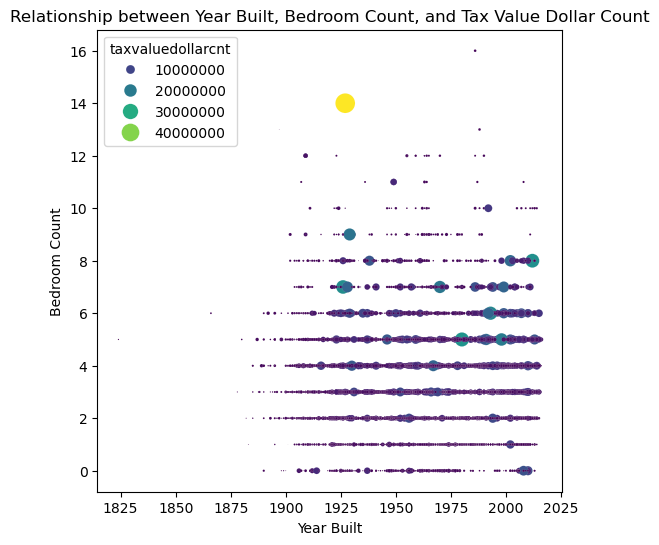

In [ ]:
#Plot of Year Built vs. Bedroom and Tax Value
plt.figure(figsize = (6,6))

min_bath = df['bathroomcnt'].min()
max_bath = df['bathroomcnt'].max()
min_bed = df['bedroomcnt'].min()
max_bed = df['bedroomcnt'].max()
maxbubble = 200

ax = sns.scatterplot(data = df, x = "yearbuilt", y = "bedroomcnt", size = "taxvaluedollarcnt", sizes = (min_bath / max_bath * maxbubble, maxbubble), hue = "taxvaluedollarcnt", palette = "viridis", legend = True)
ax.set_xlabel("Year Built")
ax.set_ylabel("Bedroom Count")
ax.set_title("Relationship between Year Built, Bedroom Count, and Tax Value Dollar Count")

plt.show()

The second bubbleplot shows the relationship between build year, bedroom count, and the value of the house. The plot above does not show as strong of a relationship between year and value as it did with year and other features, but there are slightly more expensive houses being built year by year. The bubble plot does a nice job of bringing outliers to attention as well.

For example, there is a house worth a considerable amount of money built around 1925 that has 14 bedrooms. This sample is indicated by the big yellow circle plotted alone in the top center of the graph.

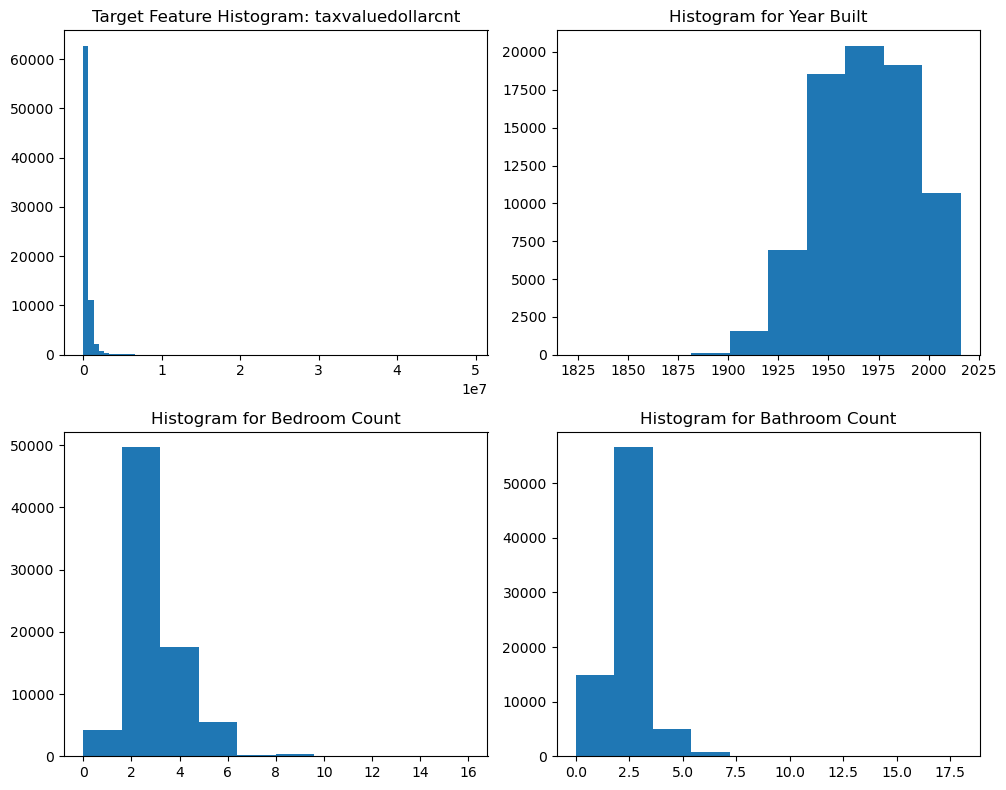

In [ ]:
# Looking at Target and 3 other features
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].hist(df['taxvaluedollarcnt'], bins = 75)
axs[0, 0].set_title('Target Feature Histogram: taxvaluedollarcnt')

axs[0,1].hist(df['yearbuilt'])
axs[0, 1].set_title('Histogram for Year Built')

axs[1,0].hist(df['bedroomcnt'])
axs[1, 0].set_title('Histogram for Bedroom Count')

axs[1,1].hist(df['bathroomcnt'])
axs[1, 1].set_title('Histogram for Bathroom Count')

plt.tight_layout()
plt.show()

Features of Interest: The features we chose to look at more closely are the target feature 'taxvaluedollarcnt', the year it was built ('yearbuilt'), the amount of bedrooms it has ('bedroomcnt),  and the amount of bathrooms ('bathroomcnt').

Target feature : 'taxvaluedollarcnt'
The distribution of the target feature is right skewed with a majority of houses being valued close to half a million dollars. However, there is an outlier worth $50 million that visually pushes the rest of the data to the far left of the plot. An outlier of this proportion could be removed before building a model.

Year Built: 'yearbuilt'
There is a slight left skew in the distribution of build years in our dataset. The 'yearbuilt' feature shows a majority of houses were built between the 1940s and 1990s. There is an outlier for an older home from the 1820s. This feature was chosen due to it's relationship with bedroom count and the tax value. The relationship of the three features is shown above and highlights some interesting trends that would be useful to analyze further in the future.

Bedroom Counts: 'bedroomcnt'
The distribution for bedroom counts was interesting. It follows a mostly normal distribution with a few outliers having between 7 and 16 bedrooms and the majority of surveyed houses having between 2 to 3 bedrooms. The amount of bedrooms typically affect the price of the house as seen in everyday context.  Through future analysis we can determine just how much bedroom counts factor into house price.

Bathroom Count: 'bathroomcnt'
The bathroom count distribution is also mostly normal. There are a few outliers with houses containing between 10 and 18 bathrooms. This feature does show some unexpected data. For instance, there are cases within the data where there are zero bathrooms. While this is unexpected, it will be interesting to see how the amount of bathrooms affects the house's tax value.

#### **2.B Discussion:** Describe in a paragraph what you learned in your detailed examination of the features you explored:
- What is the distribution (normal, exponential, etc.) if any?
- Any problems (e.g., outliers, any odd characteristics)?
- Anything else interesting? Why did you choose it?


In accordance to the distributions of all variables in the dataset, the following have a somewhat normal distribtion: finishedfloor1squarefeet and poolsizesum. Most other distributions we can consider as right skewed, with one left skewed distribution found in yearbuilt.

Some plots contain a wide stretch along the x-axis with a long stretch of variables along the y-axis towards the left side of the plot. These plots likely contain a small number of outliers, including: parcelid, bathroomcnt, bedroomcnt, calculatedbathnbr, calculatedfinishedsquarefeet, finishedsquarefeet12, finishedsquarefeet15, finishedsquarefeet50, garagecnt, garagetotalsqft, lotsizesquarefeet, propertylandusetypeid, regionidzip, roomcnt, yardbuildingsqft17 (this one is the most obvious), taxdelinquency, censustractandblock, and taxvaluedollarcnt.

A variable like basementsqft also contains outliers, however these are more evident due to the size of the y-axis. The histogram of decktypeid looks like it probably contains values above and below 66, however according to the nunique function there 66 is its only unique value. This same thing can be said about hashottuborspa, poolcnt, pooltypeid10, pooltypeid2, storytypeid, fireplaceflag and assessmentyear. Additionally, taxdelinquencyflag contains one unique value, however the way its graph came out is certainly different. Furthermore, we can assume that hashottuborspa/poolcnt should contain values at 0 if there is no hot tub or spa/pool and 1 when the house does have either.

According to these graphs, these plots likely contain NULL values. Both propertycountylandusecode and propertyzoningdesc are categorical, so it makes sense that these graphs look unusual.

## Part 3:  Clean the Data: Drop, Impute, and Encode [6 pts]



**Important Notes:**
- You should review your Homework 4 before doing this section!
- Create new names for modified data at each stage to avoid problems with global variables.
- Whenever possible, write functions for all data transformations you apply, for these reasons:
    - So you can easily prepare the data the next time you get a fresh dataset
    - So you can apply these transformations in future projects
    - To clean and prepare new data instances once your solution is live
    - To make it easy to treat your preparation choices as hyperparameters
    - [To apply the same transformations to your test set if train/test split already done -- not applicable here]

### Part 3.A: Drop features you judge to be unsuitable for the regression task

Your call, based on any research you can do to understand the feature (hopefully IRL you would have a domain expert to help with this, but do your best).   

Note: Do not drop features because of too many missing values, that's the next task!

In [ ]:
# Drop "ID" columns

df_id = df.filter(regex = "id").columns
df_id = [col for col in df_id if col != "regionidzip"] # keep regionidzip

df = df.drop(df_id, axis = 1)
len(df.columns) # should drop by 16 [55 -> 39]

39

In [ ]:
# Drop propertycountylandusecode and propertyzoningdesc

df = df.drop(["propertycountylandusecode", "propertyzoningdesc"], axis = 1)
len(df.columns) # should drop by 2 [39 -> 37]

37

In [ ]:
# Drop latitude and longitude

df = df.drop(["latitude", "longitude"], axis = 1)
len(df.columns) # should drop by 2 [37 -> 35]

35

In [ ]:
# Drop finishedfloor1squarefeet and finishedsquarefeet50

df = df.drop(["finishedfloor1squarefeet", "finishedsquarefeet50"], axis = 1)
len(df.columns) # should drop by 2 [35 -> 33]

33

In [ ]:
# Drop due to the number of unique values (has less than or equal to 3 or greater than or equal to 60% unique values)

drop_nunique_df = df.nunique()
drop_nunique_df = drop_nunique_df[(drop_nunique_df >= 0.6 * len(df)) | (drop_nunique_df < 3)]
drop_nunique_df = drop_nunique_df.index.tolist()
drop_nunique_df = [col for col in drop_nunique_df if col != "taxvaluedollarcnt"] # keep Target variable

df = df.drop(drop_nunique_df, axis = 1)
len(df.columns) # should drop by 5 [33 -> 28]

28

#### **3.A Discussion:** Justify in a paragraph your decisions about which features to drop.


We believed that most of the "id" variables will not be able to give us any insight besides regionidzip, since we are making predictions of the total assessed value of the property. The zip code is helpful in most, if not all, datasets in real estate. We assume that we may see the more pricey zip codes in accordance to the target variable.
Latitude and longitude have been removed due to them not being very useful. Additionally, in part 3C, we found that we were left with NULL columns in both finishedfloor1squarefeet and finishedsquarefeet50.

### Part 3.B: Drop **features** with "too many" null values

Your code in the next cell(s). Make a judgement call about what "too many" means and briefly describe your reasoning in the discussion.   

Note: "Too many" may depend on what the non-null values look like, be sure to investigate carefully.

In [ ]:
# Drop the "too many" missing/null variables (few missing values <5% values)

drop_missing_df = missing_df[missing_df >= 95].index
drop_missing_df = [col for col in drop_missing_df if col in df]

df = df.drop(drop_missing_df, axis = 1)
len(df.columns) # should drop to 20 [28 -> 20]

20

#### **3.B Discussion:** In a paragraph, explain your decision about which features were dropped



We decided that variables that contained too many missing values (greater than or equal to 95%) are likely not imputable and will not be helpful for this dataset.

### Part 3.C: Drop Problematic **samples**

There could be several reasons why you might want to drop a sample:
- It has  "too many" null values
- It has a null value in the target
- It contains outliers, especially in the target



Your code in the next cell(s). Make a judgement call about which samples should be dropped and briefly describe your reasoning in the discussion.   


In [ ]:
# Check how many missing values

df.isna().sum()

bathroomcnt                        34
bedroomcnt                         34
calculatedbathnbr                 650
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
lotsizesquarefeet                8292
rawcensustractandblock             34
regionidzip                        84
roomcnt                            34
threequarterbathnbr             67507
unitcnt                         26910
yearbuilt                         304
numberofstories                 60014
censustractandblock               281
taxvaluedollarcnt                  35
dtype: int64

In previous attempts, removing outliers based on the interquartile method removed over 40% of the dataset. We found that the Z-score removed less.

In [ ]:
# Removing rows with high null counts

row_threshold = df.shape[1] * 0.5

row_high_nulls = df[df.isnull().sum(axis=1) > row_threshold]

df = df.dropna(thresh=row_threshold)
print(f"Rows with over 50% nulls: {len(row_high_nulls)}")
print(f"New shape: {df.shape}")

Rows with over 50% nulls: 216
New shape: (77397, 20)


In [ ]:
#Removing outliers

df_numeric = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(df_numeric, nan_policy='omit'))
outlier_rows = (z_scores > 3).any(axis=1)
outliers_df = df[outlier_rows]

outlier_mask = (z_scores > 3).any(axis=1)
df = df[~outlier_mask].copy()
print(f"Outlier rows detected: {outliers_df.shape[0]}")
print(f"Shape after removing outliers: {df.shape}")

Outlier rows detected: 10069
Shape after removing outliers: (67328, 20)


#### **3.C Discussion:** In a short paragraph, explain your decision about which samples were dropped


 Rows with more than 50% null values were removed. With a large amount of features in this dataset, we must assume that features work in complex arrangements to determine the target feature therefore samples with large amounts of missing data should be removed. This resulted in the removal of 216 samples leaving 77,397 samples. Next outliers were found and removed. Any row that contained a value more 3 standard deviations away from the mean. This removed 10,069 rows leaving 67,328 rows available for model building.

### Part 3.D: Impute for the remaining missing values

Review the methods for imputation in **Appendix 2** and choose how you will impute the remainder of the missing values. Note:
- Consider whether different methods are justified for different features.
- In the next cells, apply your imputation methods to the dataset so that no null values remain after this step.
- Answer the discussion question.

Let's work through all variables that have missing values.

In [ ]:
# Check How Many Missing Values

missing = df.isna().sum()
missing[missing > 0]

calculatedbathnbr                 163
calculatedfinishedsquarefeet       15
finishedsquarefeet12             2686
fireplacecnt                    63869
fullbathcnt                       163
garagecarcnt                    48979
garagetotalsqft                 48979
lotsizesquarefeet                7102
regionidzip                        29
threequarterbathnbr             60046
unitcnt                         19551
yearbuilt                          48
numberofstories                 56454
censustractandblock               188
taxvaluedollarcnt                   1
dtype: int64

In [ ]:
# Imputation by filling with 0

impute_0 = ["fireplacecnt", "fullbathcnt", "threequarterbathnbr", "garagecarcnt", "unitcnt"]
df.loc[:, impute_0] = df[impute_0].fillna(0)

In [ ]:
# Impute by the median

impute_median = ["calculatedbathnbr", "calculatedfinishedsquarefeet", "finishedsquarefeet12", "garagetotalsqft", "lotsizesquarefeet", "yearbuilt", "numberofstories"]
df.loc[:, impute_median] = df[impute_median].fillna(df[impute_median].median())

In [ ]:
# Impute by the mode

impute_mode = ["censustractandblock", "taxvaluedollarcnt"]
mode = df[impute_mode].mode().iloc[0]
df[impute_mode] = df[impute_mode].fillna(mode)

In [ ]:
missing = df.isna().sum()
missing[missing > 0]

regionidzip    29
dtype: int64

### Look here for the download link :)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67328 entries, 0 to 77612
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   67328 non-null  float64
 1   bedroomcnt                    67328 non-null  float64
 2   calculatedbathnbr             67328 non-null  float64
 3   calculatedfinishedsquarefeet  67328 non-null  float64
 4   finishedsquarefeet12          67328 non-null  float64
 5   fips                          67328 non-null  float64
 6   fireplacecnt                  67328 non-null  float64
 7   fullbathcnt                   67328 non-null  float64
 8   garagecarcnt                  67328 non-null  float64
 9   garagetotalsqft               67328 non-null  float64
 10  lotsizesquarefeet             67328 non-null  float64
 11  rawcensustractandblock        67328 non-null  float64
 12  regionidzip                   67299 non-null  float64
 13  roomcn

There are still some missing values in regionidzip.

In [ ]:
# Remove based on missing data from regionidzip

df["regionidzip"].isnull().sum() # 29 missing values
df = df.dropna(subset = ["regionidzip"])

In [ ]:
missing = df.isna().sum()
missing[missing > 0]

Series([], dtype: int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67299 entries, 0 to 77612
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   67299 non-null  float64
 1   bedroomcnt                    67299 non-null  float64
 2   calculatedbathnbr             67299 non-null  float64
 3   calculatedfinishedsquarefeet  67299 non-null  float64
 4   finishedsquarefeet12          67299 non-null  float64
 5   fips                          67299 non-null  float64
 6   fireplacecnt                  67299 non-null  float64
 7   fullbathcnt                   67299 non-null  float64
 8   garagecarcnt                  67299 non-null  float64
 9   garagetotalsqft               67299 non-null  float64
 10  lotsizesquarefeet             67299 non-null  float64
 11  rawcensustractandblock        67299 non-null  float64
 12  regionidzip                   67299 non-null  float64
 13  roomcn

In [ ]:
df.to_csv("zillow_cleaned.csv", index=False)

In [ ]:
from google.colab import files
files.download('zillow_cleaned.csv')

ModuleNotFoundError: No module named 'google.colab'

There are no more missing values in our dataset.

#### **3.D Discussion:**  Describe in a paragraph your decisions about which methods you used to impute missing values in the dataset


Imputation by filling with 0 - these variables indicate whether or not that specific object exists in the house or not. The missing values are values that should likely be 0, however in the original dataset they show as a NULL value. For example, fireplacecnt says how many fireplaces are in the house, if it shows NULL in the dataset, they likely have 0 fireplaces, since that is possible.

Imputation by filling with the median - these variables are continuous and numerical mostly related to the square footage of the house. The median works best for these values that may be more scattered with potential outliers.

Imputation by filling with the mode - these variables are the most likely to be categorical-like, this is why the mode works best.

### 3.E: Encode the Categorical Features (if any)

You may not have any categorical features. If you do, encode them in the next step. No discussion is necessary.

In [ ]:
df.select_dtypes(include = ["object"]).columns

Index([], dtype='object')

There are no categorical variables to be one-hot encoded in our dataset.

## Part 4:  Investigate Feature Relationships  [6 pts]

In this part, we will investigate the feature relationships as a way of understanding the data.  In the next part, we'll investigate potential feature engineering opportunities.

**Note:**  We won't be committing to any changes to the data until Milestone 2, as our choice of transformations will very much depend on the model we're building. But investigating these aspects of the data is an essential step in the first stages of our project.

### Part 4.A:

   - Compute and analyze pairwise correlations using a correlation matrix.
   - Compute the F-statistic for all features for a better view of the relationships (displaying them in a bar chart would be useful as well).
   - Identify features with strong correlations or notable relationships that may impact model performance.
   - Investigate forward and backward feature selection
        - Run these algorithms to investigate possible feature selection (don't commit to any selections yet)

Your code below, in multiple cells with descriptive comments.

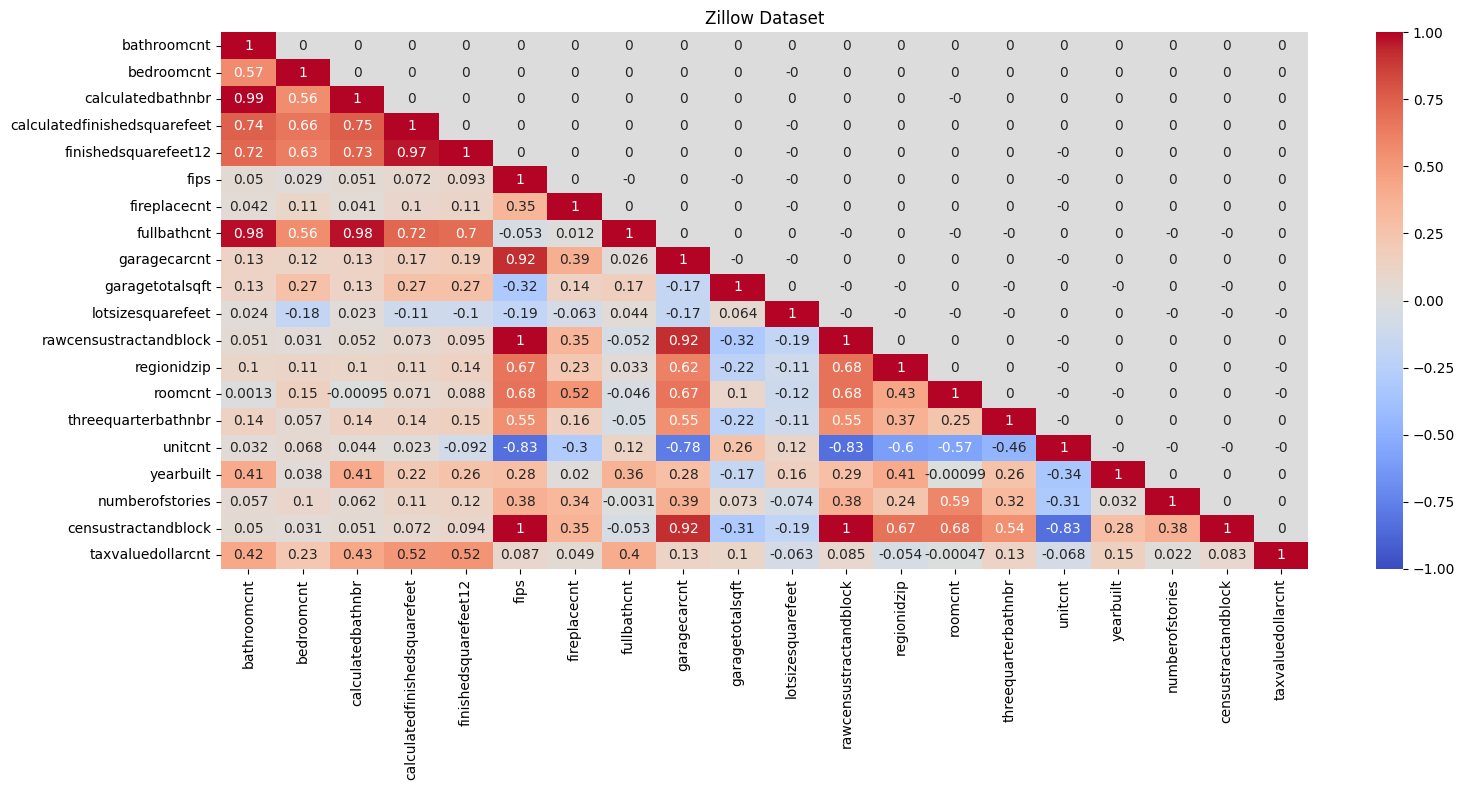

In [ ]:
# Correlation Matrix

corr_matrix = df.corr()

mask_corr_matrix = np.tril(np.ones_like(corr_matrix, dtype = bool))
lower_corr_matrix = corr_matrix * mask_corr_matrix

plt.figure(figsize = (16, 8))

# Heatmap
sns.heatmap(lower_corr_matrix, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1)
plt.title("Zillow Dataset")

plt.tight_layout()

plt.show()

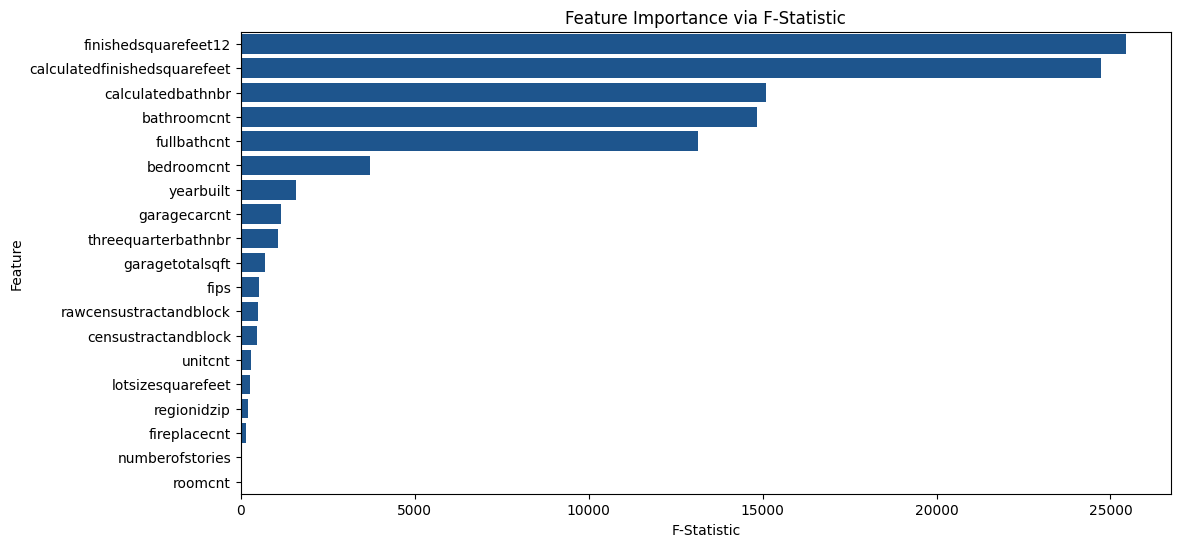

In [ ]:
# Computing the F-statistic

X = df.drop(columns = ["taxvaluedollarcnt"])
y = df["taxvaluedollarcnt"]

f_statistic, p_values = f_regression(X, y)

f_stat_df = pd.DataFrame({'Feature': X.columns, 'F-Statistic': f_statistic})
f_stat_df = f_stat_df.sort_values(by='F-Statistic', ascending=False)

# Plot F-statistics
plt.figure(figsize=(12, 6))
sns.barplot(data=f_stat_df, x='F-Statistic', y='Feature', color=sns.color_palette('Blues_r')[0])

plt.title("Feature Importance via F-Statistic")
plt.xlabel("F-Statistic")
plt.ylabel("Feature")

plt.show()

Now let's investigate Forwards and Backwards Selection

In [ ]:
# Split into Train and Test Models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Forward Selection

forward_model = LinearRegression()

selector = SequentialFeatureSelector(forward_model, n_features_to_select = "auto", direction = "forward")
selector.fit(X_train, y_train)

selector_forwards_features = X_train.columns[selector.get_support()]
selector_forwards_features # 9

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'lotsizesquarefeet', 'regionidzip',
       'roomcnt', 'unitcnt'],
      dtype='object')

In [ ]:
# Backward Selection

backward_model = LinearRegression()

selector = RFE(backward_model, n_features_to_select = 1)
selector.fit(X_train, y_train)

selected_backwards_features = X_train.columns[selector.support_]
selected_backwards_features # 1

Index(['calculatedbathnbr'], dtype='object')

#### **4.A Discussion:**  Describe in a paragraph what you see in the feature relationships and correlations.

Pay particular attention to especially interesting and/or strongly correlated feature relationships.
 How do the different methods for seeing relationships compare? Do they agree or disagree?



The following variables have a strong positive correlation:
* calculatedbathnbr and bathroomcnt
* calculatedfinishedsquarefeet with bathroomcnt and calculatedbathbr
* finishedsquarefeet12 with bathroomcnt, calculatedbathnbr, and calculatedfinishedsquarefeet
* fullbathcnt with bathroomcnt, calculatedbathnbr, calculatedfinishedsquarefeet and finishedsquarefeet12
* garagecnt with fips
* rawcensustractandblock with fips (this is a perfect correlation) and garagecarcnt
* censustractandblock with fips and rawcensustractandblock (perfect correlation) and garagecnt

There seem to be more relatively strong and even more weak positive correlations than strong positive correlations.

The following variables have a strong negative correlation:
* unitcnt with fips, garagecnt, and rawcensustractandblock
* censustractandblock with unitcnt

There also seem to be more relatively strong negative correlations and even more weak negative correlations.

In general, a larger F-statistic suggests that the feature has a stronger impact on predicting the target variable, while a smaller one says has less predictive power or is not as relevant for the model.

In our graph, we can see that the strongest predictors are finishedsquarefeet12 and calculatedfinishedsquarefeet with decently strong contenders in calculatedbathnbr, bathroomcnt, and fullbathcnt.

The weakest predictors are roomcnt, numberofstories, fireplacecnt, regionidzip, lotsizesquarefeet, and unitcnt. This tells us that our inital assumption about regionzipid is incorrect, therefore will not be as helpful.

Forward selection adds features one at a time from zero and then chooses those that improve the model the most. In our case, these 10 features: bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, finishedsquarefeet12, fips, lotsizesquarefeet, regionidzip, roomcnt, and unitcnt create the best model.

Backward selection starts off with all features and removes the least significant ones based on the model's coefficient. In our case, we have that calculatedbathnbr will create the best model.

Although, regionidzip is part of the best forward selected models, it is not in the backward selected models.

### Part 4.B:  2-Dimensional Visualizations for Interesting Patterns  
   - Select three (3) pairs of features that exhibit meaningful relationships based on your previous analysis.
   - Create 2D scatter plots or density plots to explore interactions between these features.  
   - Provide brief interpretations of any observed patterns or trends.

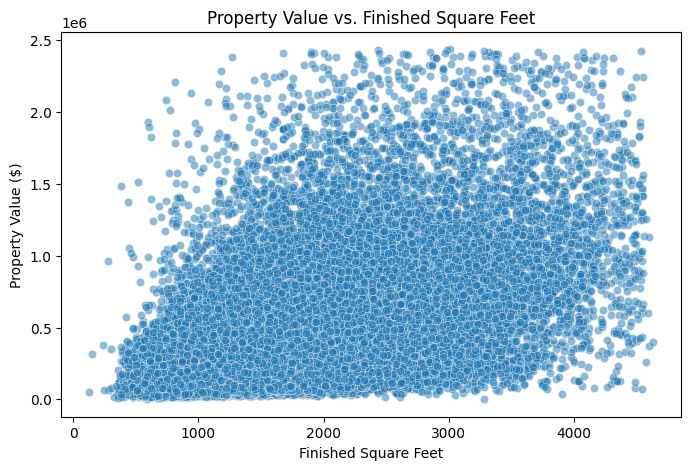

In [ ]:
# Scatter Plot

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', alpha=0.5)

plt.xlabel("Finished Square Feet")
plt.ylabel("Property Value ($)")
plt.title("Property Value vs. Finished Square Feet")

plt.show()

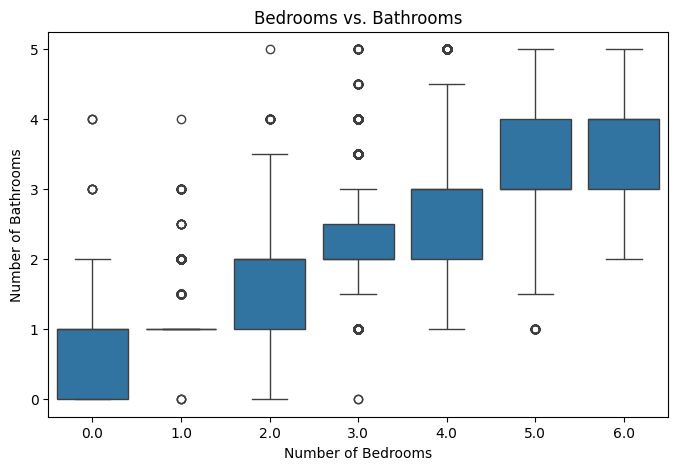

In [ ]:
# Box Plots

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='bedroomcnt', y='bathroomcnt')

plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Bathrooms")
plt.title("Bedrooms vs. Bathrooms")

plt.show()

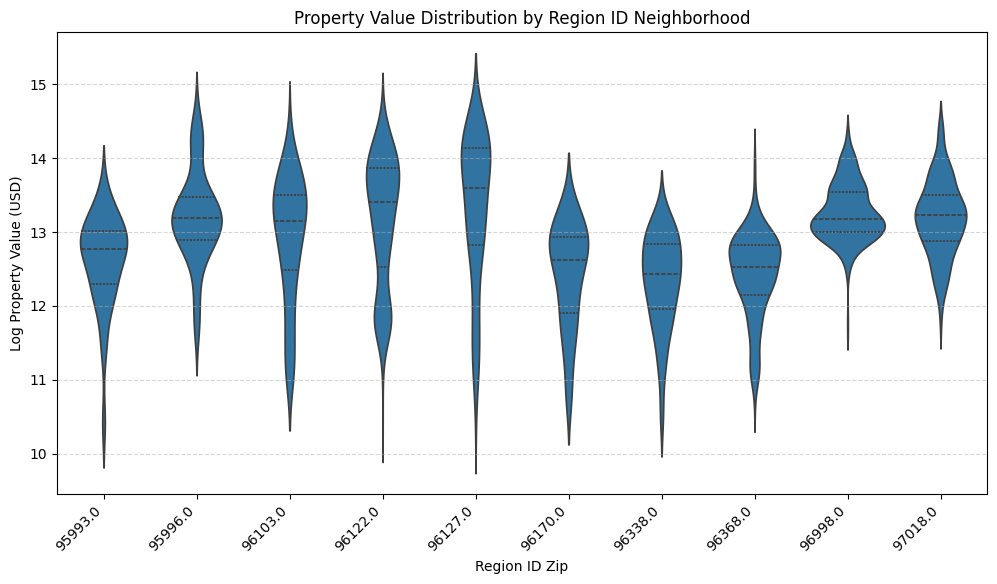

In [ ]:
# Violin Plots

# random sample of zip codes
sample_zipcodes = df['regionidzip'].dropna().sample(n=10, random_state=42).unique()  # Select 10 random zip codes
df_sample = df[df['regionidzip'].isin(sample_zipcodes)].copy()  # Create a copy to avoid warnings

plt.figure(figsize=(12, 6))
sns.violinplot(x='regionidzip', y=np.log1p(df_sample['taxvaluedollarcnt']), data=df_sample, inner="quartile")

plt.xlabel("Region ID Zip")
plt.ylabel("Log Property Value (USD)")
plt.title("Property Value Distribution by Region ID Neighborhood")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

#### **4.B Discussion:** Provide brief interpretations of any observed patterns or trends.


Scatter plot: While the plot above shows highly densed clusters, you can tell by looking along the top left part there is a shape towards being a strong positive correlation. This can be confirmed with the correlation matrix; we have a relatively strong correlation at 0.52.

Box plots: There is a clear upwards trend showing that the number of bedrooms and bathrooms are correlated with each other.

Violin plots: Since these plots are randomly generated every time this cell is executed, we can't talk about a specific trend that is observed. However, it is useful to view the plot to compare the different region id's and its property values side-by-side. The sections of the violin plot that are larger contain a majority of the distribution, meaning that they represent the mean range of values. The tail ends represent the ends of a traditional distribution bell curve. The violin plots can be used to estimate probabilities where when estimating the price of a new sample, there is a high probability that the price will fall within the wider section of the violin plot.

## Part 5:  Feature Engineering: Investigate various transformations to better expose the underlying data patterns to machine learning algorithms. [6 pts]

**Important Notes:**  
- This last part is a bit open ended, since there is a huge variety of feature engineering techniques, most of which won't be useful for your particular dataset.
- Understand that you can't evaluate the final usefulness of these transformations
until you choose a model, and  models may respond differently to various transformations or obviate some transformations (e.g., ensemble methods already do feature selection).
- Therefore, write your transformations as functions or otherwise be prepared
to choose later on which transformations may be necessary.

**Investigate feature engineering, where appropriate:**

- Feature scaling: standardize or normalize features as necessary
- Decompose features (e.g., categorical into One-Hot feature sequence, date/time into two features data and time, etc.).
- Add promising transformations of features
    - Exponential $\exp(x_i)$ or logarithmic $\log(x_j)$
    - Polynomial features  ( $x_i^2$, $x_i - x_j$), products ($x_i*x_j$), or ratios ($x_i/x_j$)

**ToDo:**
- Pick at least three transformations to try.
- Try each one and evaluate its effect using correlations or F-scores or a feature selection algorithm.
- Answer the discussion question.

In [ ]:
# To reiterate

X = df.drop(columns = ["taxvaluedollarcnt"])
y = df["taxvaluedollarcnt"]

In [ ]:
# Exponential and Logarithmic Transformation

X_clipped = np.clip(X, None, 100)

X_exp = np.exp(X_clipped)
y_log = np.log(y + 1)

X_train, X_test, y_train, y_test = train_test_split(X_exp, y_log, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}")

rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error:0.6802353660199548
Root Mean Squared Error: 0.8247638243885063


In [ ]:
# Polynomial Transformation

y_log = np.log(y + 1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_clipped = np.clip(X_poly, None, 100)

X_train, X_test, y_train, y_test = train_test_split(X_clipped, y_log, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.5362408448175737
Root Mean Squared Error: 0.7322846747116682


In [ ]:
# Ratios Transformation

X = X.to_numpy()

y_log = np.log(y + 1)

# Apply ratio transformation to the features (X)
X_ratios = []
for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        ratio = X[:, i] / (X[:, j] + 1e-10)
        X_ratios.append(ratio)

X_ratios = np.array(X_ratios).T  # Transpose
X_augmented = np.hstack((X, X_ratios))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_augmented)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.4563683669584122
Root Mean Squared Error: 0.6755504177768024


#### **5 Discussion:** Describe in a paragraph why you chose these transformations and what you observed.


We wanted to test out all transformations, however found it difficult to use only one transformation at a time, especially with the logarithm and exponential transformation. Both the logarithmic and exponential transformation of the features and target dataset, respectively, can make the data more easier for the model to learn and captures underlying growth patterns in the data that may help improve model performance. The polynomial transformation can capture non-linear relationships between features, meanwhile the ratios transformation can underline relationships between features that might be more predictive.

For all transformations, we used the Linear Regression model and looked for its mean squared error and root mean squared error value to determine the models performance (a smaller MSE/RMSE shows better model performance). We saw that the all transformations generated small MSEs indicating a good performing Linear Regression model. The ratios model outputs the best MSE/RMSE.

## **Appendix 1: Features of the Zillow Dataset**  

0. **parcelid**: Unique identifier for the property parcel.  
1. **airconditioningtypeid**: Identifier for the type of air conditioning installed.  
2. **architecturalstyletypeid**: Identifier for the architectural style of the property.  
3. **basementsqft**: Square footage of the basement.  
4. **bathroomcnt**: Number of bathrooms.  
5. **bedroomcnt**: Number of bedrooms.  
6. **buildingclasstypeid**: Identifier for the building framing type (e.g., wood frame, steel frame).  
7. **buildingqualitytypeid**: Numeric value indicating the quality of the building (higher values often indicate better quality).  
8. **calculatedbathnbr**: Calculated number of bathrooms, including fractional bathrooms.  
9. **decktypeid**: Identifier for the type of deck.  
10. **finishedfloor1squarefeet**: Square footage of the finished area on the first floor.  
11. **calculatedfinishedsquarefeet**: Total finished living area square footage.  
12. **finishedsquarefeet12**: Finished living area square footage.  
13. **finishedsquarefeet13**: Perimeter living area square footage.  
14. **finishedsquarefeet15**: Total area.  
15. **finishedsquarefeet50**: Square footage of the finished area on the upper floors.  
16. **finishedsquarefeet6**: Base unfinished and finished area square footage.  
17. **fips**: Federal Information Processing Standards code, uniquely identifying counties and county equivalents.  
18. **fireplacecnt**: Number of fireplaces.  
19. **fullbathcnt**: Number of full bathrooms.  
20. **garagecarcnt**: Number of cars that can fit in the garage.  
21. **garagetotalsqft**: Total square footage of the garage.  
22. **hashottuborspa**: Indicates if the property has a hot tub or spa.  
23. **heatingorsystemtypeid**: Identifier for the type of heating system.  
24. **latitude**: Latitude coordinate of the property.  
25. **longitude**: Longitude coordinate of the property.  
26. **lotsizesquarefeet**: Lot size in square feet.  
27. **poolcnt**: Number of pools on the property.  
28. **poolsizesum**: Total square footage of all pools.  
29. **pooltypeid10**: Identifier for spa or hot tub.  
30. **pooltypeid2**: Identifier for pool with spa or hot tub.  
31. **pooltypeid7**: Identifier for pool without hot tub or spa.  
32. **propertycountylandusecode**: County land use code for the property.  
33. **propertylandusetypeid**: Identifier for the property land use type.  
34. **propertyzoningdesc**: Description of the property's zoning.  
35. **rawcensustractandblock**: Unprocessed census tract and block identifier.  
36. **regionidcity**: Identifier for the city.  
37. **regionidcounty**: Identifier for the county.  
38. **regionidneighborhood**: Identifier for the neighborhood.  
39. **regionidzip**: Identifier for the ZIP code.  
40. **roomcnt**: Total number of rooms.  
41. **storytypeid**: Identifier for the type of stories in the building (e.g., basement, attic).  
42. **threequarterbathnbr**: Number of 3/4 bathrooms (typically includes a shower but no tub).  
43. **typeconstructiontypeid**: Identifier for the type of construction (e.g., frame, masonry).  
44. **unitcnt**: Number of units in the building (e.g., for multi-family properties).  
45. **yardbuildingsqft17**: Square footage of the 17th yard building (e.g., shed).  
46. **yardbuildingsqft26**: Square footage of the 26th yard building.  
47. **yearbuilt**: Year the property was built.  
48. **numberofstories**: Number of stories in the building.  
49. **fireplaceflag**: Indicates if the property has a fireplace.  
50. **assessmentyear**: Year the property was assessed.  
51. **taxdelinquencyflag**: Indicates whether the property’s taxes are delinquent. Often “Y” if taxes are past due; otherwise null/empty.  
52. **taxdelinquencyyear**: The year in which the property’s taxes became delinquent.  
53. **censustractandblock**: A combined identifier for the property’s census tract and block group (part of the U.S. Census geographic hierarchy).  
54. **taxvaluedollarcnt**: Total assessed value of the property (land plus structure) in dollars.  


## Appendix 2: Summary of Basic Imputation Methods
Imputation depends on the data type and context. Below are common techniques for handling missing values.

---

### **1. Simple Imputation (Basic Methods)**
| Method | Best For | Code Example | Pros | Cons |
|--------|---------|--------------|------|------|
| **Drop Missing Values** | Few missing values (<5% of data) | `df.dropna()` | Quick and easy | Can remove valuable data |
| **Mean Imputation** | Normally distributed numerical data | `df.fillna(df.mean())` | Preserves mean; simple | Distorts variance, weak for skewed data |
| **Median Imputation** | Skewed numerical data | `df.fillna(df.median())` | Robust to outliers | May not capture patterns |
| **Mode Imputation** | Categorical features | `df.fillna(df.mode().iloc[0])` | Keeps most common category | Can introduce bias |
| **Constant Value (e.g., 0)** | Special cases (e.g., unknown numerical data) | `df.fillna(0)` | Simple and interpretable | Can mislead model |
| **"Unknown" Category Imputation** (**New Addition**) | Categorical features with missing values | `df.fillna('Unknown')` | Keeps all rows, prevents data loss | May introduce artificial category |

---

### **2. Statistical & Advanced Imputation**
| Method | Best For | Code Example | Pros | Cons |
|--------|---------|--------------|------|------|
| **Interpolation** | Time series, ordered data | `df.interpolate(method='linear')` | Preserves trends | May not work for non-continuous data |
| **K-Nearest Neighbors (KNN)** | Small datasets, patterns in features | `KNNImputer(n_neighbors=5).fit_transform(df)` | Uses similar observations | Computationally expensive |
| **Multivariate Imputation (MICE)** | Complex relationships between variables | `IterativeImputer().fit_transform(df)` | Captures relationships | Slower than mean/median |
| **Regression Imputation** | When missing values depend on other variables | Train regression model to predict missing values | More accurate than mean/median | Risk of overfitting |

---

### **When to Use "Unknown" Category for Categorical Imputation**
✅ **Good for:**
- Categorical features where missing values may indicate meaningful differences.  
- Customer data (e.g., missing survey responses → "No Response").  
- Product categories where missing could be a separate group.  

❌ **Avoid if:**
- The missing category does **not** have a meaningful interpretation.
- The model might learn spurious patterns from an artificial category.

---

### **Which Method to Choose?**
| Scenario | Best Method |
|----------|------------|
| **Few missing values (<5%)** | Drop NaNs (`df.dropna()`) |
| **Numerical & normal distribution** | Mean (`df.fillna(df.mean())`) |
| **Numerical & skewed distribution** | Median (`df.fillna(df.median())`) |
| **Categorical features** | Mode (`df.fillna(df.mode().iloc[0])`) |
| **Categorical with possible meaning in missingness** | "Unknown" Category (`df.fillna('Unknown')`) |
| **Small dataset with patterns** | KNN Imputer (`KNNImputer()`) |
| **Complex relationships between features** | MICE / Iterative Imputer |

